In [24]:
def simplePlot(statsS, keysS, stats_interval=1):
    """
    plot the training and validation error and accuracy
    """
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)

    for i in range(len(statsS)):
        stats = statsS[i]
        keys = keysS[i]
        # Plot the change in the validation and training set error over training.

        for k in ['error(train)', 'error(valid)']:
            ax_1.plot(
                np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys[k]],
                label=k)
        # Plot the change in the validation and training set accuracy over training.
        for k in ['acc(train)', 'acc(valid)']:
            ax_2.plot(
                np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys[k]],
                label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    return fig_1, fig_2, ax_1, ax_2

# Visualising CNN output

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
import pickle as pkl
import numpy as np

## Baseline Models

### `1 Convolution Layer`

    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=5, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer((12x12x5,)),
    AffineLayer(12x12x5, hidden_dim=100, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim=100, output_dim=47, weights_init, biases_init)

In [6]:
# import data:
baseline1_earlystop = pkl.load(open('./10_CNN/baseline/1layer/baseline_1layer_earlystop.pkl','rb'))
baseline1_adam = pkl.load(open('./10_CNN/baseline/1layer/ottokar_BASELINE_1layer_ADAM.pkl', 'rb'))
baseline1_momentum = pkl.load(open('./10_CNN/baseline/1layer/ottokar_baseline1_NOEARLYSTOP_MOMENTUM.pkl','rb'))

In [ ]:
fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(111)
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(111)
fig3 = plt.figure(figsize=(6,6))
ax3 = fig3.add_subplot(111)
fig4 = plt.figure(figsize=(6,6))
ax4 = fig4.add_subplot(111)

labels = ['Early Stop', 'w/Adam']
for data in [baseline1_earlystop, baseline1_adam]:
    
    stats = data[0]
    keys = data[1]
    #     trainig error
     ax1.plot(np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys['error(train)']],
                label=labels[i])
    #     training accuracy
    ax2.plot(np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys['acc(train)']],
                label=labels[i])
    #     validation error
    ax3.plot(np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys['error(valid)']],
                label=labels[i])
    #     validation accuracy
    ax4.plot(np.arange(1, stats.shape[0]) * stats_interval,
                stats[1:, keys['acc(valid)']],
                label=labels[i])
    i+=1
# statsS.append(baseline1_momentum[1])
# keysS.append(baseline1_momentum[2])

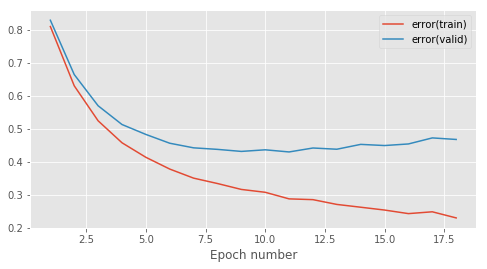

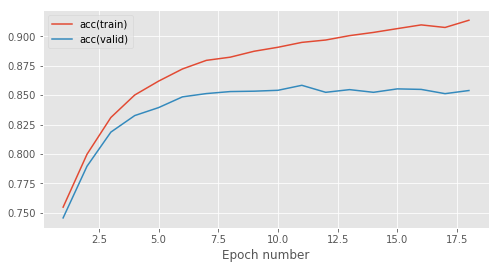

In [26]:
simplePlot(baseline1_earlystop[0], baseline1_earlystop[1], stats_interval=1)

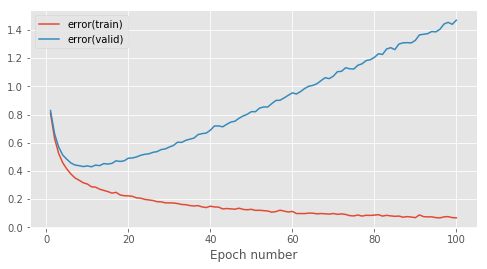

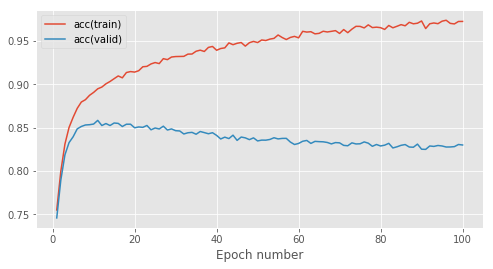

In [27]:
simplePlot(baseline1_ottokar[0], baseline1_ottokar[1], stats_interval=1)

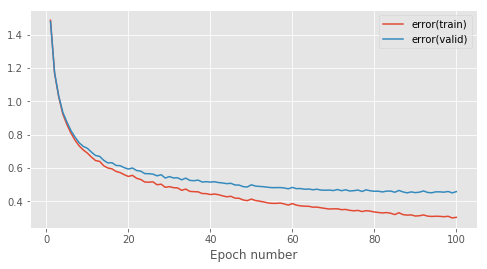

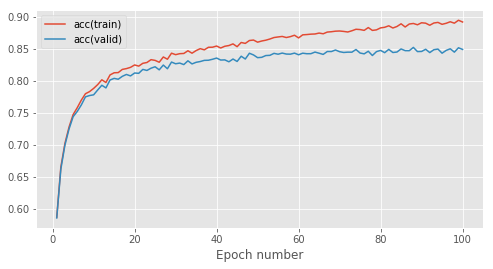

In [23]:
simplePlot(baseline1_momentum[1], baseline1_momentum[2], stats_interval=1)

??? Need more epoch?

### `2 Convolution Layer`

    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=5, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer(output_shape=(12 * 12 * 5,)),
    ReluLayer(),
    ReshapeLayer(output_shape=(5,12,12)),
    ConvolutionalLayer(
        num_input_channels=5,
        num_output_channels=10,
        input_dim_1=12,
        input_dim_2=12,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=10, input_dim_1=8, input_dim_2=8, extent=2),
    ReshapeLayer(output_shape=(4 * 4 * 10,)),
    AffineLayer(4*4*10, hidden_dim=100, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim=100, output_dim=47, weights_init, biases_init)

In [36]:
files = [f for f in os.listdir('./2layer') if f[-4:]=='.pkl']
files

['ottokar_BASELINE_2layer_ADAM.pkl',
 'ottokar_baseline2_NOEARLYSTOP_MOMENTUMx3.pkl',
 'BASELINE2_EARLYSTOP_1.pkl',
 'melchoir_baseline2_NOEARLYSTOP_MOMENTUM.pkl',
 'penman_baseline2_NOEARLYSTOP_MOMENTUM.pkl',
 'ottokar_BASELINE_2layer_momentum.pkl']

    EARLY STOP

In [34]:
baseline2_earlyStop = pkl.load(open('./2layer/BASELINE2_EARLYSTOP_1.pkl','rb'))

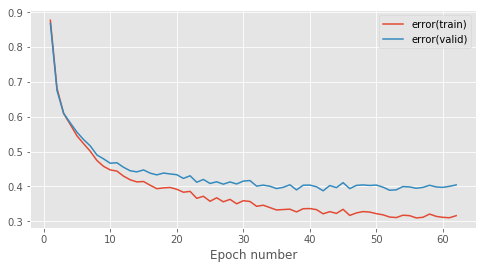

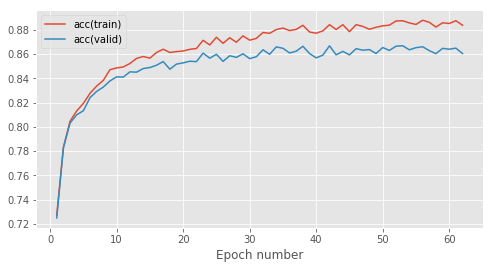

In [35]:
simplePlot(baseline2_earlyStop[0], baseline2_earlyStop[1], stats_interval=1)

    MOMENTUM?

In [56]:
baseline2_mom = pkl.load(open('./2layer/ottokar_BASELINE_2layer_momentum.pkl','rb'))

In [63]:
baseline2_mom[-1]

47188.20958137512

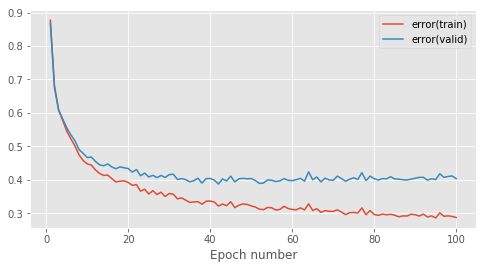

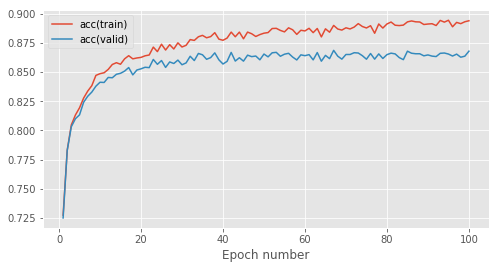

In [58]:
simplePlot(baseline2_mom[0], baseline2_mom[1], stats_interval=1)

    300 models

In [44]:
baseline2_momentum_300_1 = pkl.load(open('./2layer/melchoir_baseline2_NOEARLYSTOP_MOMENTUM.pkl','rb'))
baseline2_momentum_300_2 = pkl.load(open('./2layer/penman_baseline2_NOEARLYSTOP_MOMENTUM.pkl','rb'))
baseline2_momentum_300_3 = pkl.load(open('./2layer/ottokar_baseline2_NOEARLYSTOP_MOMENTUMx3.pkl','rb'))

# 2Conv + 4DNN

In [77]:
ls 2layer_4DNN/

gCloud_BASELINE_2layer_4DNN.1.pkl
gcloud_BASELINE_2layer_4DNN.1.model.pkl
pyramid_BASELINE_2layer_4DNN.1.model.pkl
pyramid_BASELINE_2layer_4DNN.1.pkl


In [70]:
layer2_4dnn_2 = pkl.load(open('./2layer_4DNN/gCloud_BASELINE_2layer_4DNN.1.pkl','rb'))
layer2_4dnn_3 = pkl.load(open('./2layer_4DNN/pyramid_BASELINE_2layer_4DNN.1.pkl','rb'))

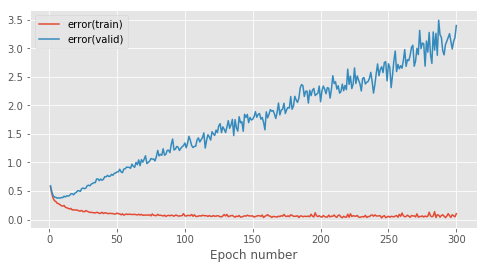

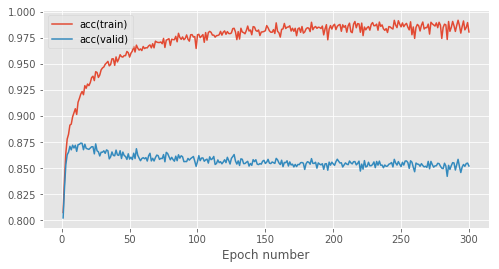

In [71]:
simplePlot(layer2_4dnn_1[0], layer2_4dnn_1[1], stats_interval=1)

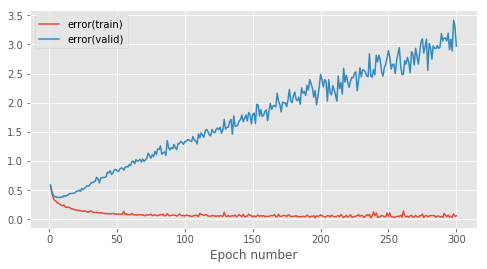

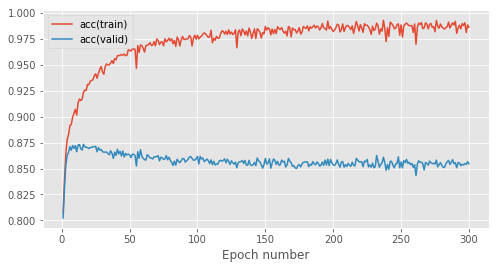

In [75]:
simplePlot(layer2_4dnn_3[0], layer2_4dnn_3[1], stats_interval=1)

---
# LeNet5 Expt

    ReshapeLayer(output_shape=(1, 28, 28)),
    ConvolutionalLayer(
        num_input_channels=1,
        num_output_channels=20,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=20, input_dim_1=24, input_dim_2=24, extent=2),
    ReshapeLayer(output_shape=(12 * 12 * 20,)),
    ReluLayer(),
    ReshapeLayer(output_shape=(20,12,12)),
    ConvolutionalLayer(
        num_input_channels=20,
        num_output_channels=50,
        input_dim_1=12,
        input_dim_2=12,
        kernel_dim_1=5,
        kernel_dim_2=5,
        padding=0,
        stride=1),
    MaxPoolingLayer(
        num_input_channels=50, input_dim_1=8, input_dim_2=8, extent=2),
    ReshapeLayer(output_shape=(4 * 4 * 50,)),
    ReluLayer(),
    AffineLayer(4 * 4 * 50, 400, HeNormalInit(fan_in = 4 * 4 * 50, rng=rng), biases_init),
    ReluLayer(),
    AffineLayer(400, output_dim, HeNormalInit(fan_in = 4 * 4 * 50,rng=rng), biases_init)

In [35]:
lenet_1_he = pkl.load(open('../lenetEXPT/leNet_1.pkl','rb'))
lenet_1_xav = pkl.load(open('../lenetEXPT/leNet-XAVIER_1.pkl', 'rb'))

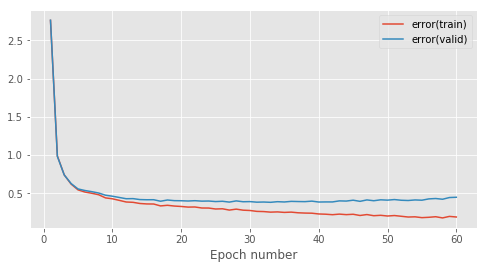

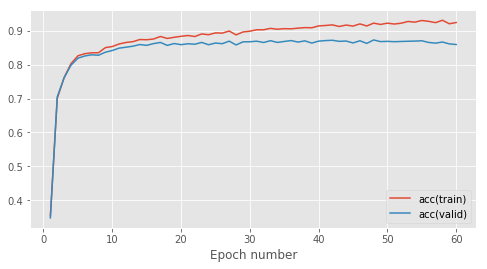

In [36]:
simplePlot(lenet_1_he[0], lenet_1_he[1], stats_interval=1)

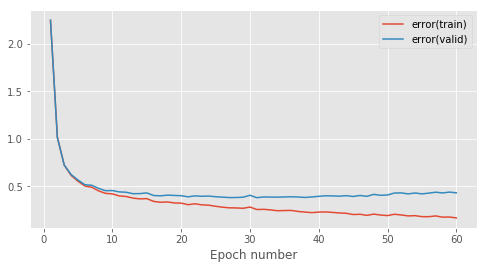

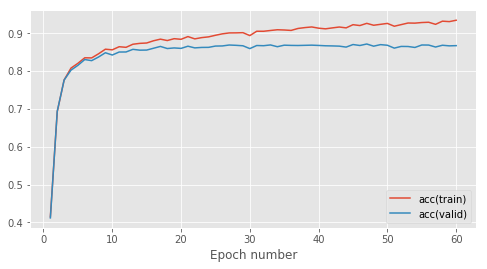

In [33]:
simplePlot(lenet_1_xav[0], lenet_1_xav[1], stats_interval=1)